<a href="https://colab.research.google.com/github/AshishPandey88/Image-Segmentation--Impact-of-pace-of-Urbanisation-and-land-use/blob/main/varthur_lake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skimage.io import imread, imshow
import numpy as np
from skimage.future import graph
from skimage import segmentation, color, filters,io,data
from matplotlib import pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import os

In [ ]:
#Now we will do the morphological operations on image of sunflower
from google.colab import files
uploaded = files.upload()

Saving 2002.jpg to 2002.jpg
Saving 2007.jpg to 2007.jpg
Saving 2012.jpg to 2012.jpg
Saving 2015.jpg to 2015.jpg
Saving 2018.jpg to 2018.jpg
Saving 2021.jpg to 2021.jpg


In [ ]:
from google.colab import drive
image_name=[image_name for image_name in os.listdir('/content/varthur')]
image_name.sort()

In [ ]:
image_name

['2002.jpg', '2006.jpg', '2009.jpg', '2014.jpg', '2017.jpg', '2021.jpg']

In [ ]:
folder='/content/varthur'

In [ ]:
image_path=[]
for i in image_name:
    image_path.append(folder+"//"+ i)

In [ ]:
image=[]
for i in image_path:
    img=load_img(i)
    img=img_to_array(img)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    image.append(img)

In [ ]:
 img = np.vstack(image)

# Using Region based RAGs

In [ ]:
labels = segmentation.slic(img[5], compactness=10, n_segments=100000, start_label=1)

In [ ]:
gimg=color.rgb2gray(img)

In [ ]:
edges = filters.sobel(gimg)

In [ ]:
edges_rgb = color.gray2rgb(edges)

In [ ]:
labels.shape

(944, 1570)

In [ ]:
edges_rgb.shape

(6, 944, 1570, 3)

In [ ]:
g=[]
for i in range(len(image_name)):
    g.append(graph.rag_boundary(labels, edges[i]))

In [ ]:
g

In [ ]:
title=['Year-2002', 'Year-2006', 'Year-2009', 'Year-2014', 'Year-2017', 'Year-2021']

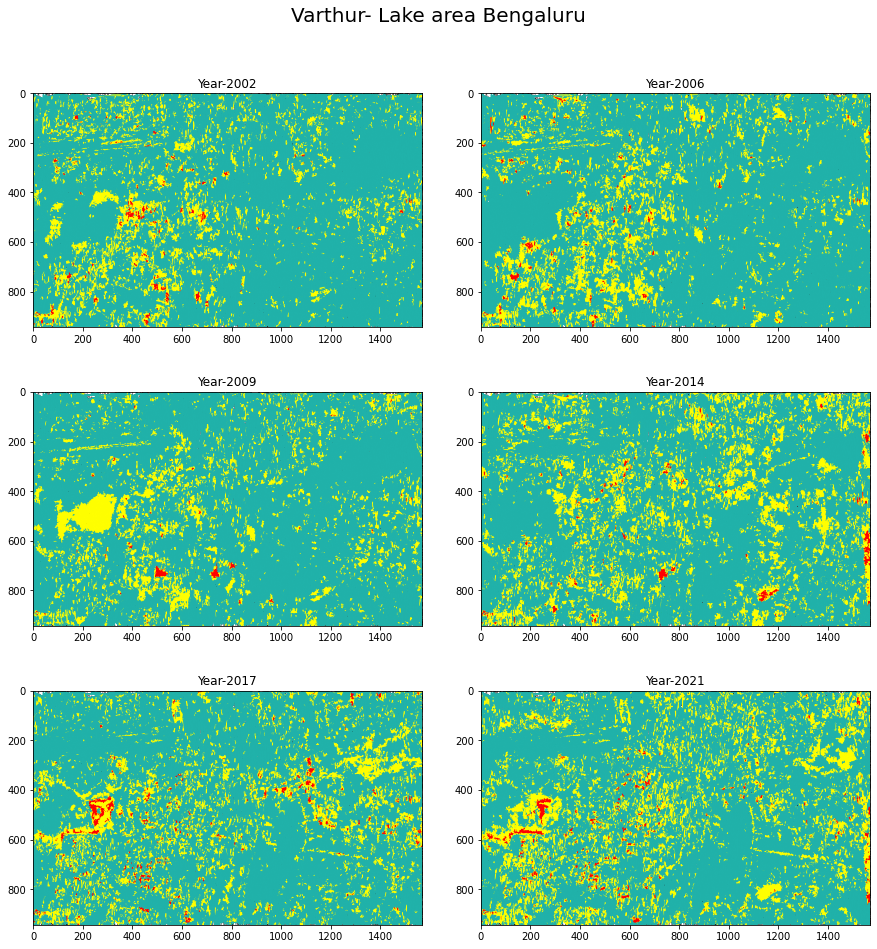

In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#fig,ax=plt.subplots(2,2,figsize=(15,15))
fig, ax=plt.subplots(3,2,figsize=(15,15))
fig.suptitle('Varthur- Lake area Bengaluru', fontsize=20)
fig.subplots_adjust(hspace =0, wspace=.15,bottom=0.1,top=0.93)
ax=ax.ravel()
for i in range(len(image_name)):
    for j in title:
        ax[i].set_title(title[i])
        graph.show_rag(labels, g[i], edges_rgb[i], img_cmap='bone', edge_cmap=ListedColormap(["lightseagreen","yellow","red"]),
                                           edge_width=1.2,ax=ax[i])
io.show()

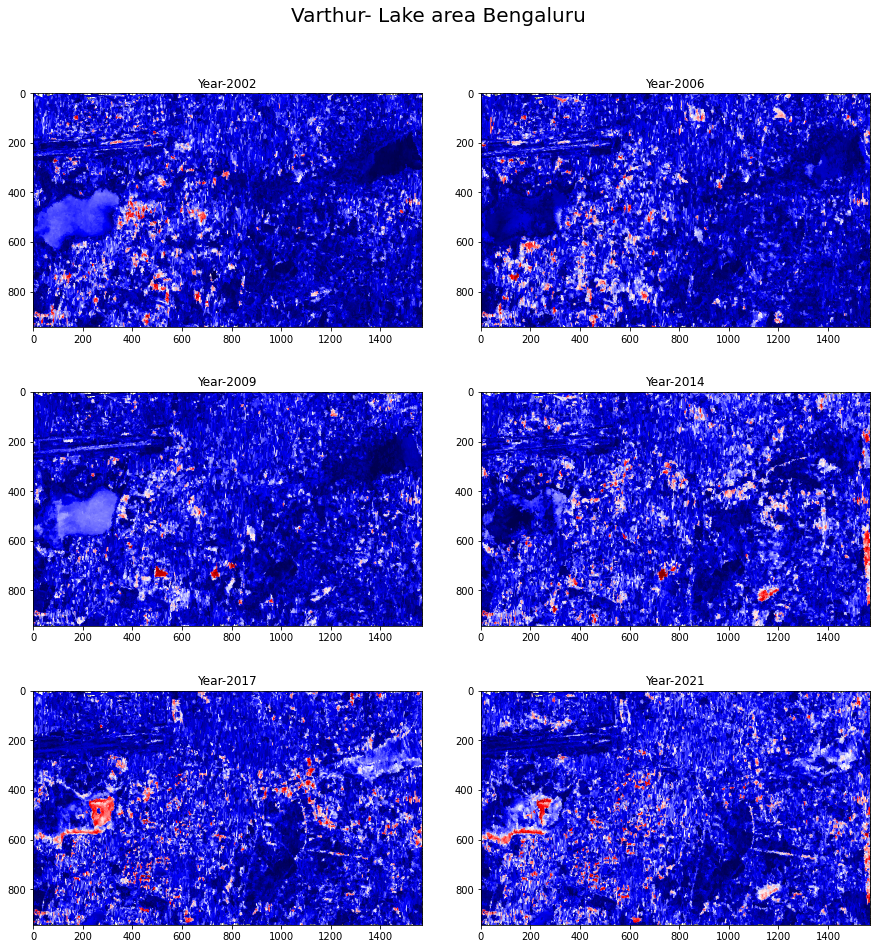

In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#fig,ax=plt.subplots(2,2,figsize=(15,15))
fig, ax=plt.subplots(3,2,figsize=(15,15))
fig.suptitle('Varthur- Lake area Bengaluru', fontsize=20)
fig.subplots_adjust(hspace =0, wspace=.15,bottom=0.1,top=0.93)
ax=ax.ravel()
for i in range(len(image_name)):
    for j in title:
        ax[i].set_title(title[i])
        graph.show_rag(labels, g[i], edges_rgb[i], img_cmap='bone', edge_cmap='seismic',
                                           edge_width=1.2,ax=ax[i])
io.show()

# Multi-Otsu Thresholding

In [ ]:
from skimage.filters import threshold_multiotsu

In [ ]:
gimg=color.rgb2gray(img)

In [ ]:
gimg[0]<50

array([[False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True,  True],
       ...,
       [False,  True,  True, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       [False, False,  True, ...,  True,  True, False]])

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


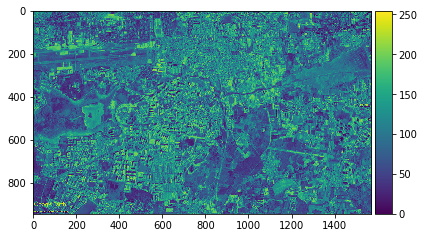

In [ ]:
imshow(gimg[5])

In [ ]:
#regions[0]

array([[3, 3, 2, ..., 1, 1, 0],
       [3, 3, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(gimg[5],classes=5)

In [ ]:
thresholds

array([ 56.169586,  87.98245 , 120.78946 , 157.57309 ], dtype=float32)

In [ ]:
# Using the threshold values, we generate the three regions.
regions = np.digitize(gimg, bins=thresholds)

In [ ]:
print("max cluster number {}, min cluster number {}".format(regions[0].max(),regions[0].min()))

max cluster number 4, min cluster number 0


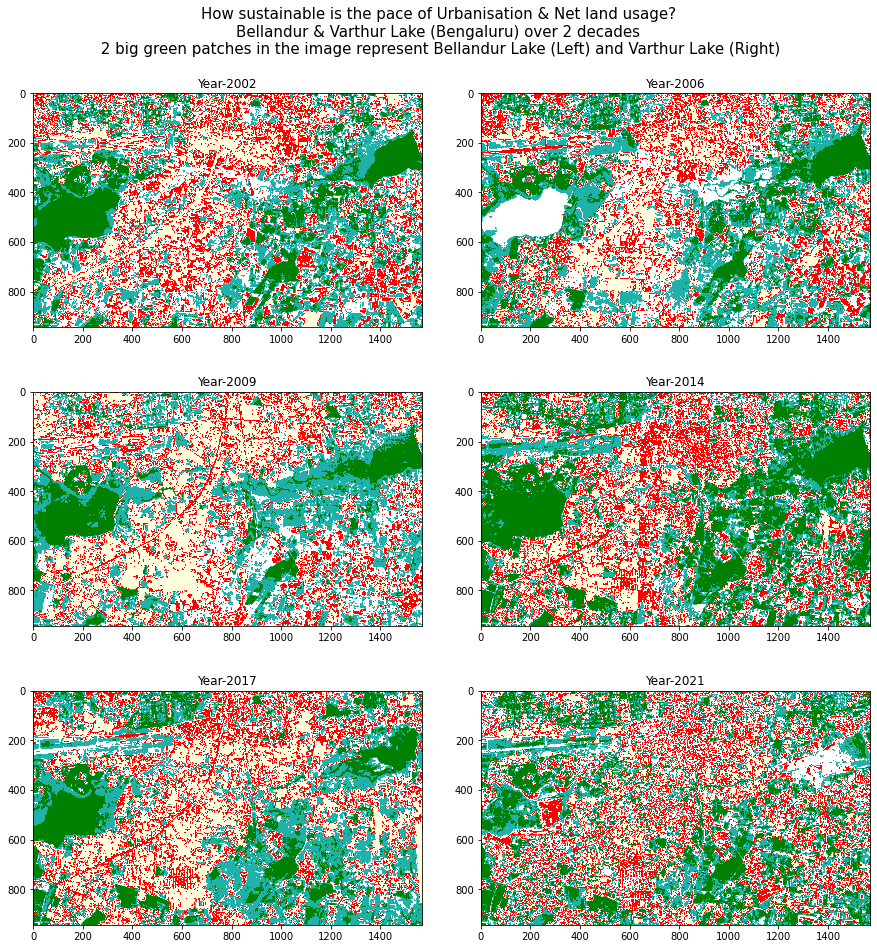

In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#fig,ax=plt.subplots(2,2,figsize=(15,15))
fig, ax=plt.subplots(3,2,figsize=(15,15))
#fig.suptitle('Impact of increase in net land usage on Bellandur & Varthur Lake over 2 decades', fontsize=20)
fig.suptitle('How sustainable is the pace of Urbanisation & Net land usage?\nBellandur & Varthur Lake (Bengaluru) over 2 decades\n 2 big green patches in the image represent Bellandur Lake (Left) and Varthur Lake (Right)', fontsize=15)
fig.subplots_adjust(hspace =0, wspace=.15,bottom=0.1,top=0.93)
ax=ax.ravel()
for i in range(len(image_name)):
    for j in title:
        ax[i].set_title(title[i])
        #plt.text(200, 500, "Bellandur Lake", bbox=dict(fill=True,facecolor='white', edgecolor='white', linewidth=2))
        #plt.text(1400, 350, "Varthur Lake", bbox=dict(fill=True,facecolor='white', edgecolor='white', linewidth=2))
        ax[i].imshow(regions[i], cmap=ListedColormap(["green","lightseagreen","white","red","lightyellow"]))
        
io.show()